In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
# Read the rapidminer clustering data
baskets = pd.read_csv('data/rapidminer_clust_data2.csv')
data2 = pd.read_csv('data/Dataset2.csv')

In [136]:
baskets

,InvoiceGlobalId,cluster
0,4099_1273451,0
1,4099_1273452,0
2,4099_1273453,0
3,4099_1273455,4
4,4099_1273456,0
...,...,...
139911,8553_263646,4
139912,8553_263647,5
139913,8553_263648,4
139914,8553_263649,2


In [137]:
# Merge the data with the Dataset2,csv on the InvoiceGlobalId column
baskets = pd.merge(baskets, data2, on='InvoiceGlobalId')

In [138]:
# Convert DateTime column to datetime format
baskets['DateTime'] = pd.to_datetime(baskets['DateTime'])

# Create new columns for year, month, day, hour, minute, second
baskets['Year'] = baskets['DateTime'].dt.year
baskets['Month'] = baskets['DateTime'].dt.month
baskets['Day'] = baskets['DateTime'].dt.day
baskets['Hour'] = baskets['DateTime'].dt.hour
# baskets['Minute'] = baskets['DateTime'].dt.minute

# Create new column for day of week
baskets['DayOfWeek'] = baskets['DateTime'].dt.dayofweek
baskets['DayOfWeek'] = baskets['DayOfWeek'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                           4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
# Create new column for time of day
baskets['TimeOfDay'] = baskets['Hour'].apply(lambda x: 'Morning' if 6 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Evening'))
baskets['MonthName'] = baskets['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                       5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                       9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [139]:
baskets

,InvoiceGlobalId,cluster,StoreId,DateTime,Subcategory,Quantity,Revenue,Year,Month,Day,Hour,DayOfWeek,TimeOfDay,MonthName
0,4099_1273451,0,4099,2023-10-02 07:06:28,CIG,3,12.3,2023,10,2,7,Monday,Morning,October
1,4099_1273452,0,4099,2023-10-02 07:16:09,CIG,2,7.8,2023,10,2,7,Monday,Morning,October
2,4099_1273453,0,4099,2023-10-02 07:21:36,CIG,1,4.0,2023,10,2,7,Monday,Morning,October
3,4099_1273455,4,4099,2023-10-02 07:34:41,CAKE,1,1.1,2023,10,2,7,Monday,Morning,October
4,4099_1273456,0,4099,2023-10-02 07:37:17,CIG,1,3.9,2023,10,2,7,Monday,Morning,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214613,8553_263648,4,10502,2023-11-05 23:44:25,BEERS,1,1.8,2023,11,5,23,Sunday,Evening,November
214614,8553_263649,2,10502,2023-11-05 23:50:12,CIDER,2,3.4,2023,11,5,23,Sunday,Evening,November
214615,8553_263649,2,10502,2023-11-05 23:50:12,VAPE,1,7.0,2023,11,5,23,Sunday,Evening,November
214616,8553_263649,2,10502,2023-11-05 23:50:12,CHIPS,3,4.7,2023,11,5,23,Sunday,Evening,November


## Map the cluster numbers to the cluster names

* Cluster 0: 'Factory Cigarettes'
* Cluster 1: 'Natural Water'
* Cluster 2: 'Chips & Drinks'
* Cluster 3: 'Energy Drinks'
* Cluster 4: 'Beers'
* Cluster 5: 'Roll Your Own'
* Cluster 6: 'Heated Devices'
* Cluster 7: 'Packaged Food'

In [140]:
# Map the cluster numbers to the cluster names
baskets['cluster'] = baskets['cluster'].map({0: 'Factory Cigarettes', 1: 'Natural Water',
                                             2: 'Chips & Drinks', 3: 'Energy Drinks', 4: 'Beers', 
                                             5: 'Roll Your Own', 6: 'Heated Devices', 7: 'Packaged Food'})

In [141]:
baskets

,InvoiceGlobalId,cluster,StoreId,DateTime,Subcategory,Quantity,Revenue,Year,Month,Day,Hour,DayOfWeek,TimeOfDay,MonthName
0,4099_1273451,Factory Cigarettes,4099,2023-10-02 07:06:28,CIG,3,12.3,2023,10,2,7,Monday,Morning,October
1,4099_1273452,Factory Cigarettes,4099,2023-10-02 07:16:09,CIG,2,7.8,2023,10,2,7,Monday,Morning,October
2,4099_1273453,Factory Cigarettes,4099,2023-10-02 07:21:36,CIG,1,4.0,2023,10,2,7,Monday,Morning,October
3,4099_1273455,Beers,4099,2023-10-02 07:34:41,CAKE,1,1.1,2023,10,2,7,Monday,Morning,October
4,4099_1273456,Factory Cigarettes,4099,2023-10-02 07:37:17,CIG,1,3.9,2023,10,2,7,Monday,Morning,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214613,8553_263648,Beers,10502,2023-11-05 23:44:25,BEERS,1,1.8,2023,11,5,23,Sunday,Evening,November
214614,8553_263649,Chips & Drinks,10502,2023-11-05 23:50:12,CIDER,2,3.4,2023,11,5,23,Sunday,Evening,November
214615,8553_263649,Chips & Drinks,10502,2023-11-05 23:50:12,VAPE,1,7.0,2023,11,5,23,Sunday,Evening,November
214616,8553_263649,Chips & Drinks,10502,2023-11-05 23:50:12,CHIPS,3,4.7,2023,11,5,23,Sunday,Evening,November


## Calculate :
- Average price of product per mission
- Average size of basket (invoice) per mission 
- Average revenue per mission

In [142]:
# Group by cluster and InvoiceGlobalId and get the average price per mission (Revenue / Quantity)
avg_price = baskets.groupby(['cluster', 'InvoiceGlobalId']).agg({'Revenue': 'sum', 'Quantity': 'sum'}).reset_index()
avg_price['AvgPrice'] = avg_price['Revenue'] / avg_price['Quantity']
avg_price = avg_price.groupby('cluster').agg({'AvgPrice': 'mean'}).reset_index()
avg_price.round(2)

,cluster,AvgPrice
0,Beers,3.02
1,Chips & Drinks,1.79
2,Energy Drinks,1.76
3,Factory Cigarettes,4.08
4,Heated Devices,3.67
5,Natural Water,1.37
6,Packaged Food,2.45
7,Roll Your Own,4.65


In [143]:
# Group by cluster and InvoiceGlobalId and get the average size of basket per mission (number of unique products)
avg_basket_size = baskets.groupby(['cluster', 'InvoiceGlobalId']).agg({'Quantity': 'sum'}).reset_index()
avg_basket_size = avg_basket_size.groupby('cluster').agg({'Quantity': 'mean'}).reset_index()
avg_basket_size.round(2)

,cluster,Quantity
0,Beers,1.96
1,Chips & Drinks,2.76
2,Energy Drinks,2.33
3,Factory Cigarettes,2.24
4,Heated Devices,2.79
5,Natural Water,2.61
6,Packaged Food,2.82
7,Roll Your Own,3.07


In [144]:
# Group by cluster and InvoiceGlobalId and get the average size of basket per mission (number of unique products)
avg_revenue = baskets.groupby(['cluster', 'InvoiceGlobalId']).agg({'Revenue': 'sum'}).reset_index()
avg_revenue = avg_revenue.groupby('cluster').agg({'Revenue': 'mean'}).reset_index()
avg_revenue.round(2)

,cluster,Revenue
0,Beers,4.90
1,Chips & Drinks,4.97
2,Energy Drinks,4.35
3,Factory Cigarettes,8.64
4,Heated Devices,10.08
5,Natural Water,4.04
6,Packaged Food,6.86
7,Roll Your Own,11.13


Merge all tables in one

In [148]:
# Merge the average price and average basket size dataframes
avg_price_basket = pd.merge(avg_price, avg_basket_size, on='cluster')
# Merge the average price and average basket size dataframes
avg_price_basket_revenue = pd.merge(avg_price_basket, avg_revenue, on='cluster')
avg_price_basket_revenue.round(2)

,cluster,AvgPrice,Quantity,Revenue
0,Beers,3.02,1.96,4.90
1,Chips & Drinks,1.79,2.76,4.97
2,Energy Drinks,1.76,2.33,4.35
3,Factory Cigarettes,4.08,2.24,8.64
4,Heated Devices,3.67,2.79,10.08
5,Natural Water,1.37,2.61,4.04
6,Packaged Food,2.45,2.82,6.86
7,Roll Your Own,4.65,3.07,11.13


## 1. Analyse at what time of the day and day of the week, are the different clusters purchased (get unique transactions per day and hour)


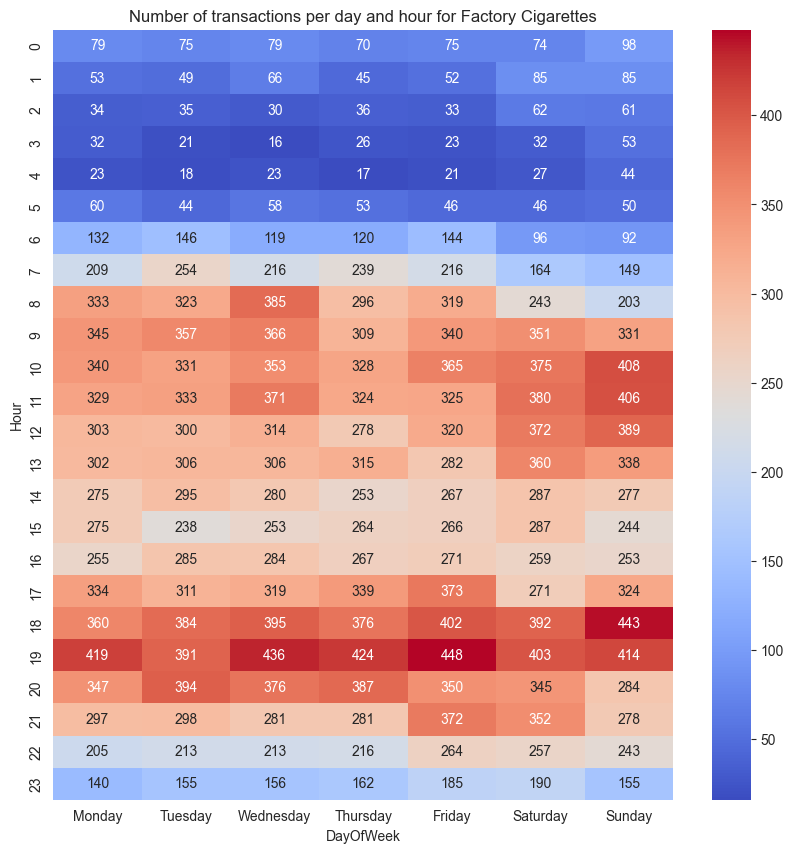

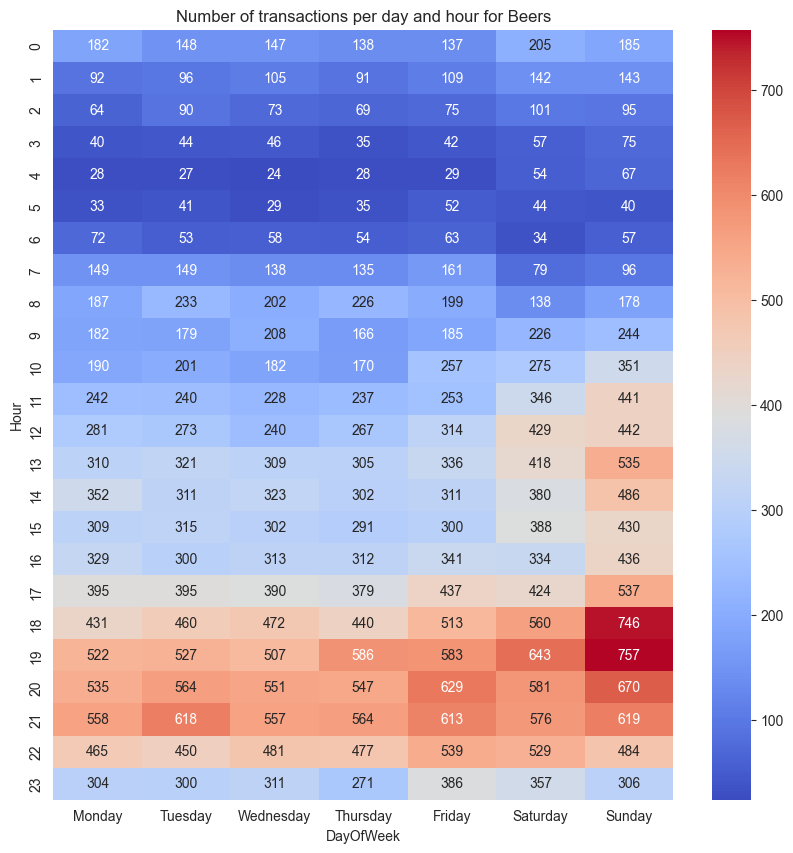

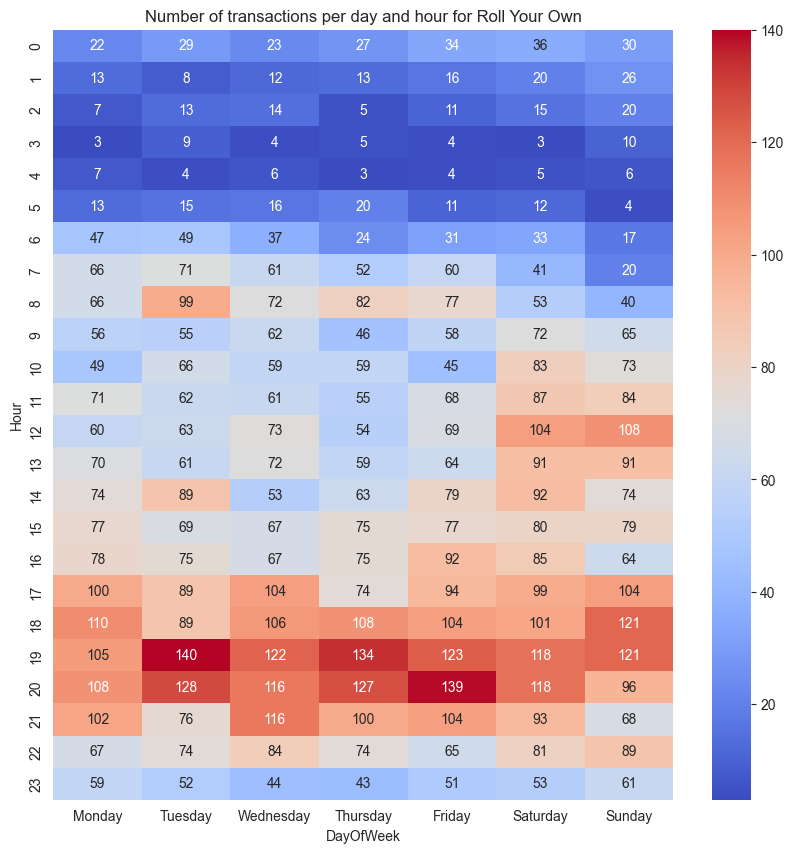

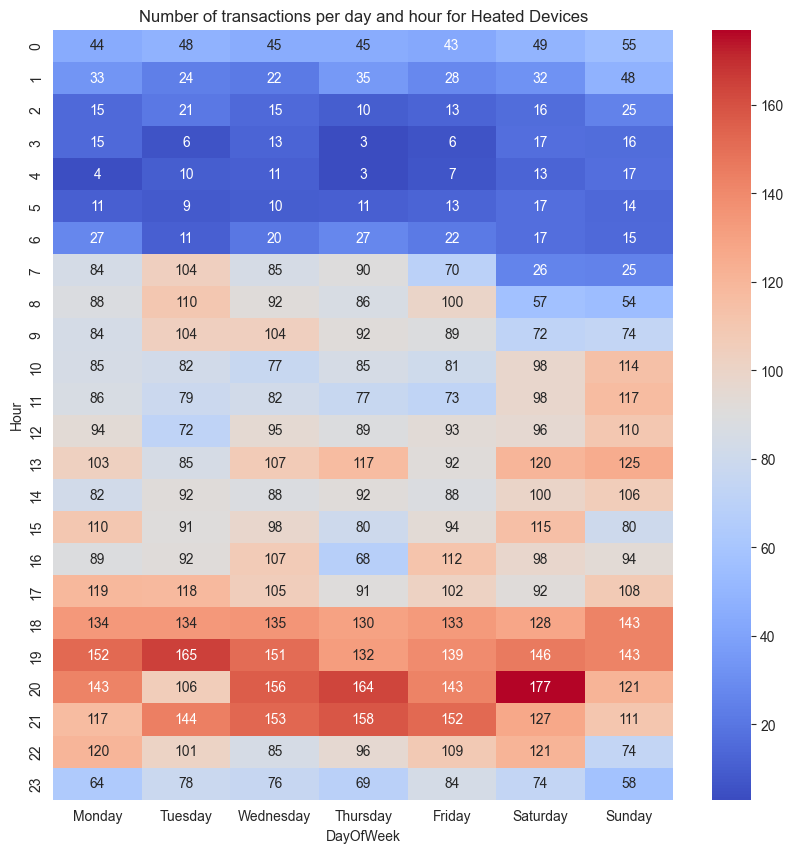

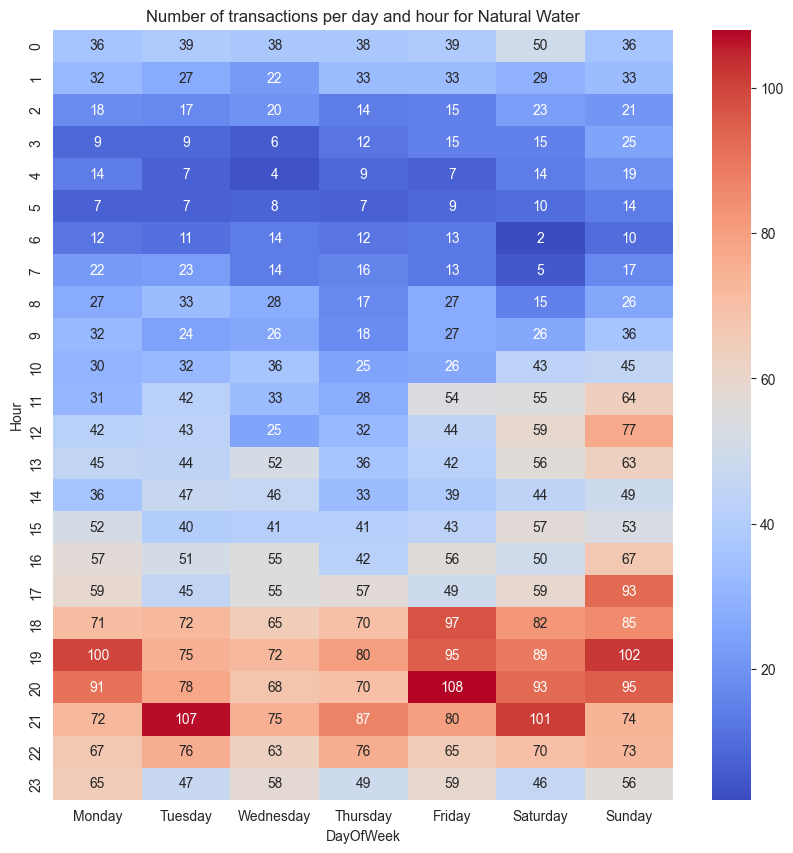

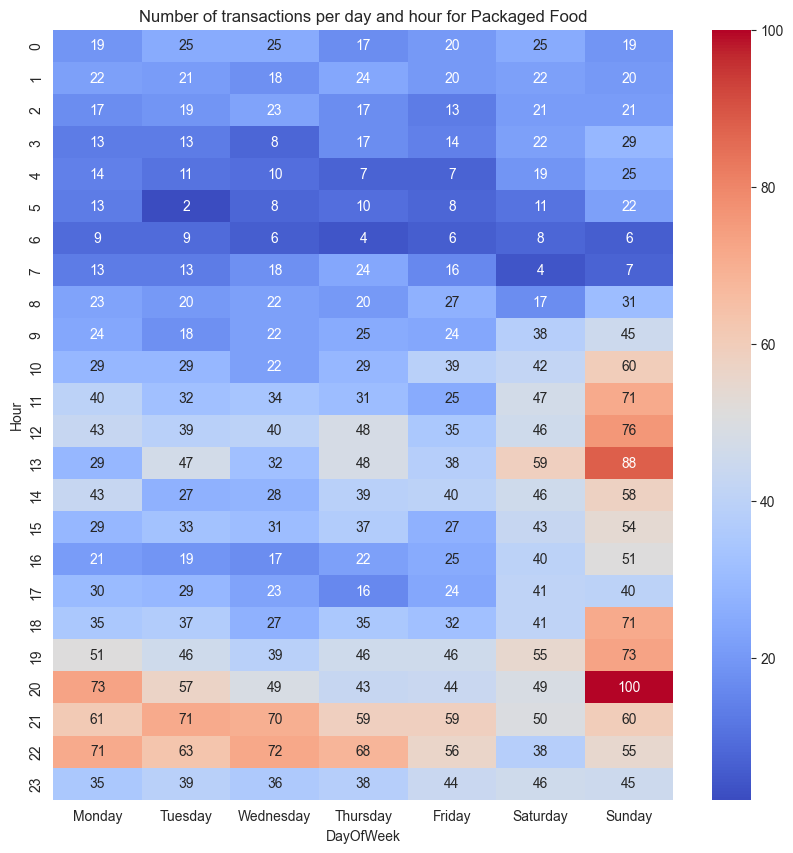

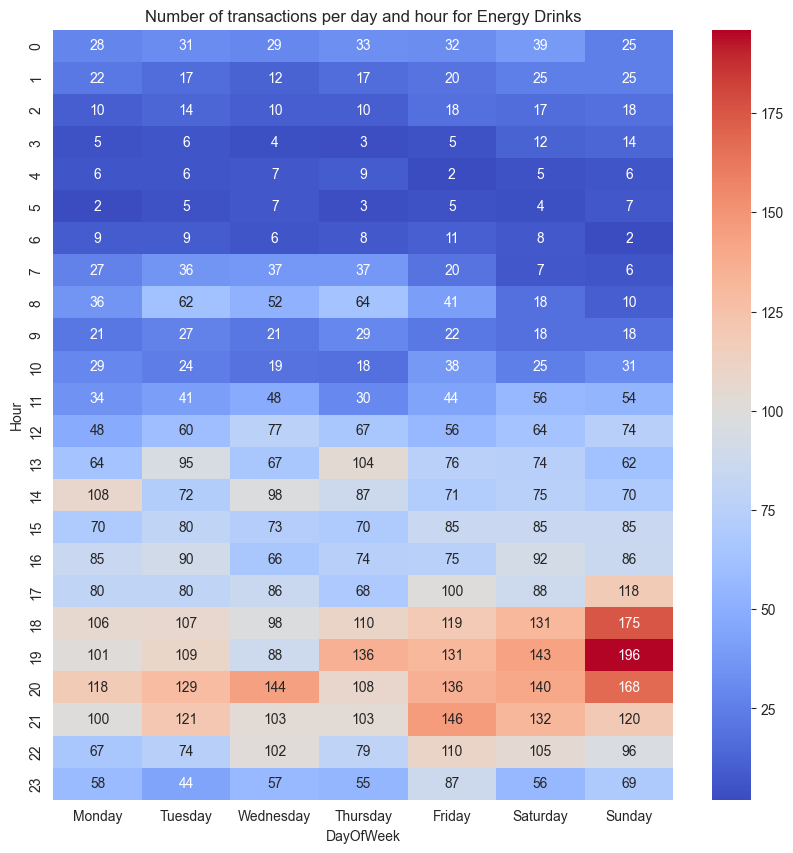

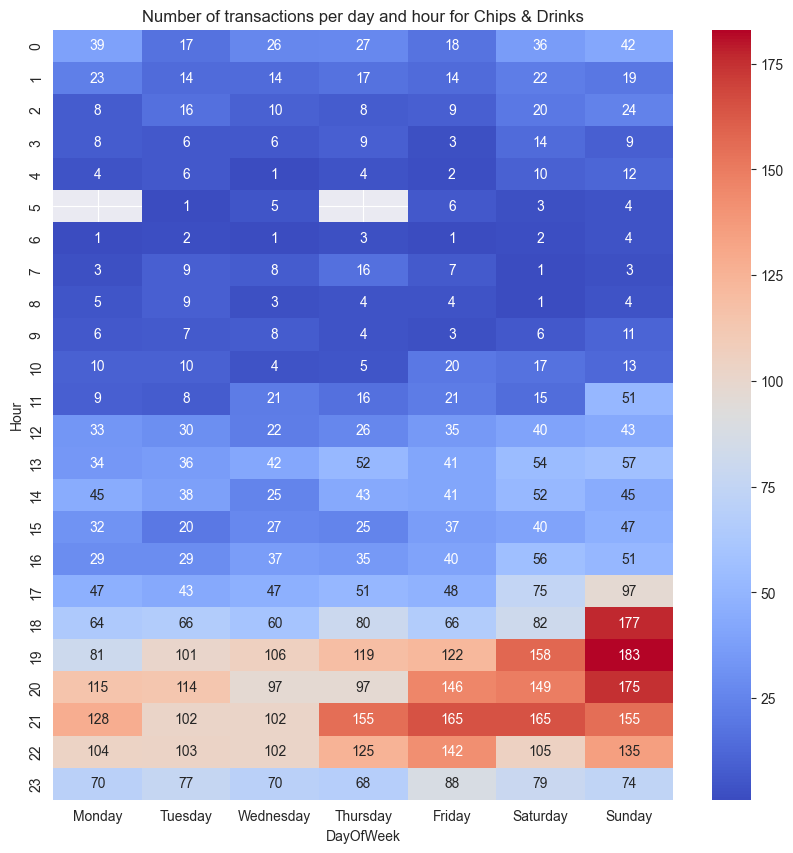

In [146]:
for category in baskets['cluster'].unique():
    baskets_categ = baskets[baskets['cluster'] == category]
    # Group by month,day,hour and InvoiceGlobalID
    grouped_data = baskets_categ.groupby(['DayOfWeek', 'Hour']).agg({
        'InvoiceGlobalId': 'nunique',  # Counting the number of unique transactions per group
        'Revenue': 'sum'      # Summing up the revenue per group
    }).reset_index()
    # Create a heatmap of the number of transactions per day and hour

    # Create a pivot table and sort the columns by day of week for month 10
    pivot_table = grouped_data.pivot_table(index='Hour', columns='DayOfWeek', values='InvoiceGlobalId').reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    
    # EXPORT TO CSV
    # pivot_table.to_csv('data/{}_heatmap.csv'.format(category))
    
    # Create heatmap
    plt.figure(figsize=(10, 10))
    # Make the cmap to be a gradient from blue to red (better in light mode)
    cmap = 'coolwarm'
    sns.heatmap(pivot_table, annot=True, fmt='g', cmap=cmap)
    plt.title('Number of transactions per day and hour for {}'.format(category))
    plt.show()

## 2. Analyse at what time of the day and day of the week, are the different clusters purchased (get revenue per day and hour)

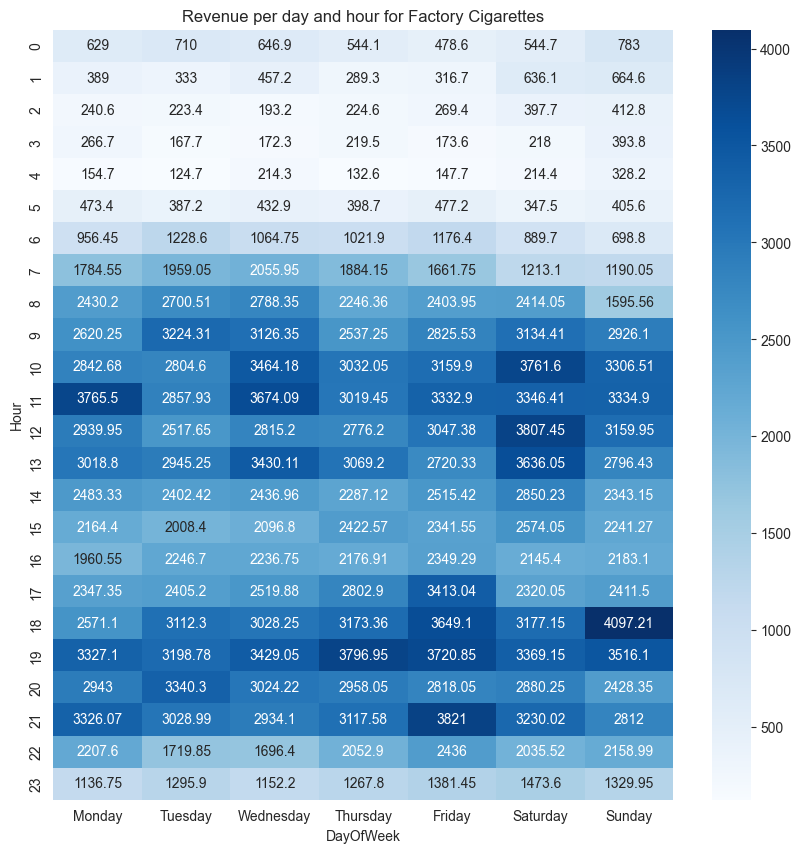

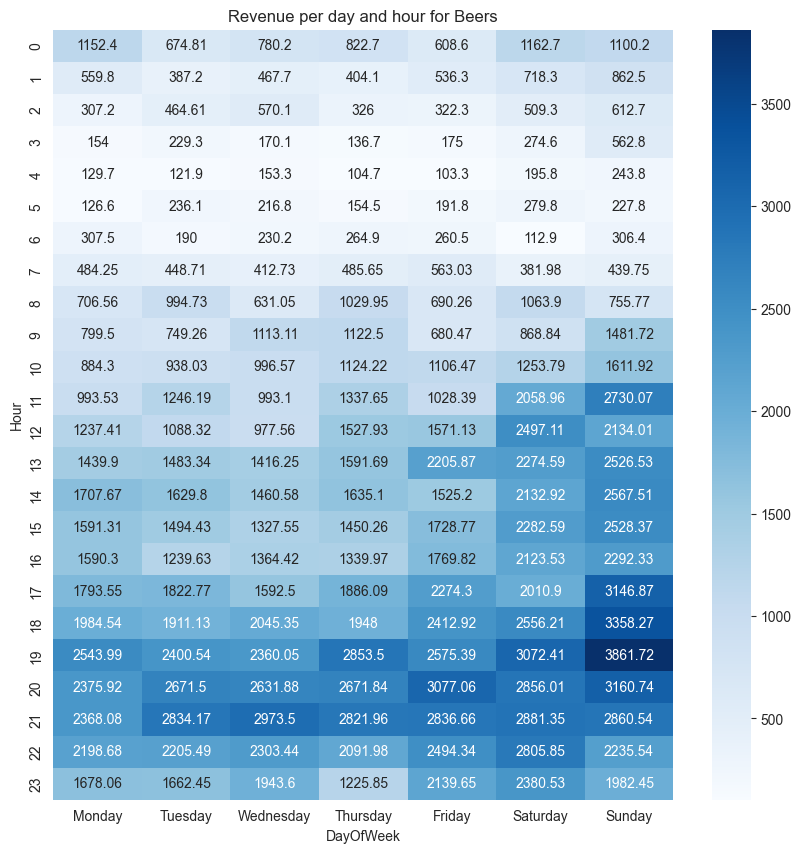

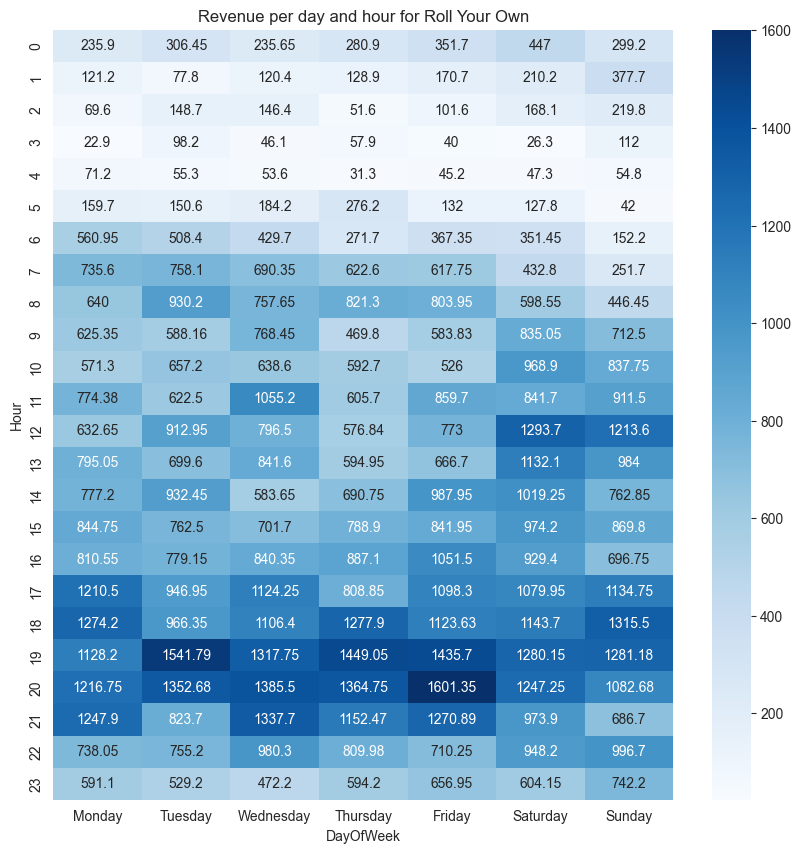

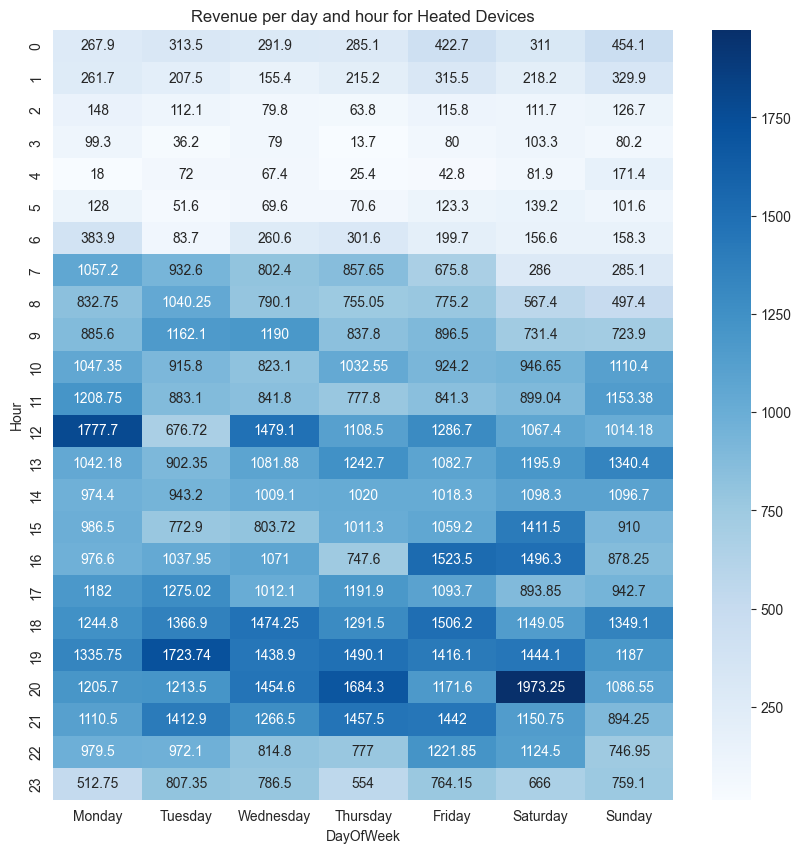

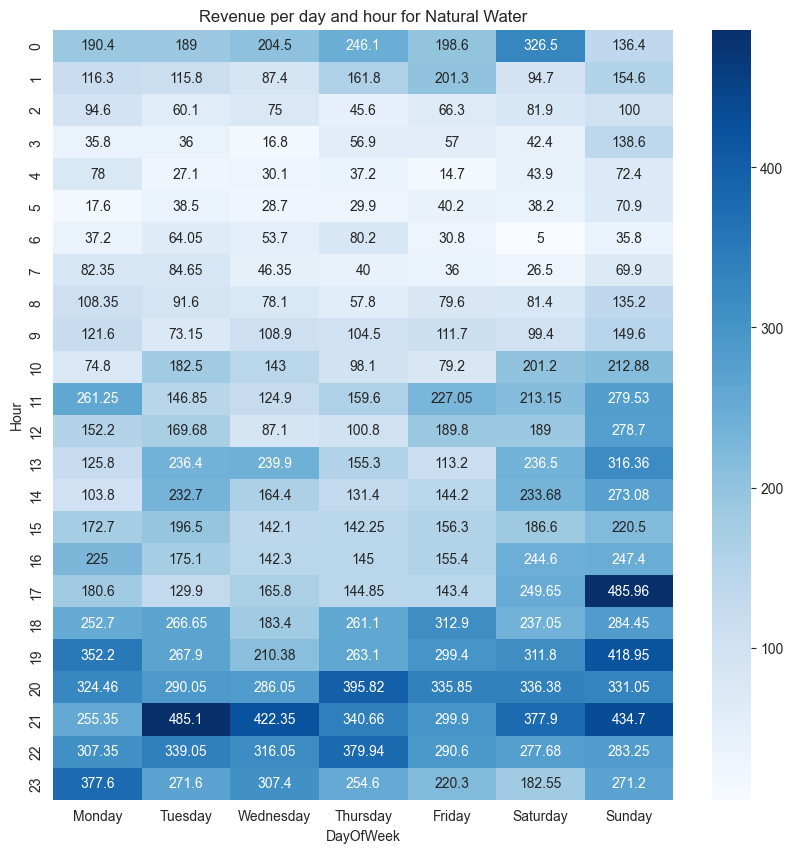

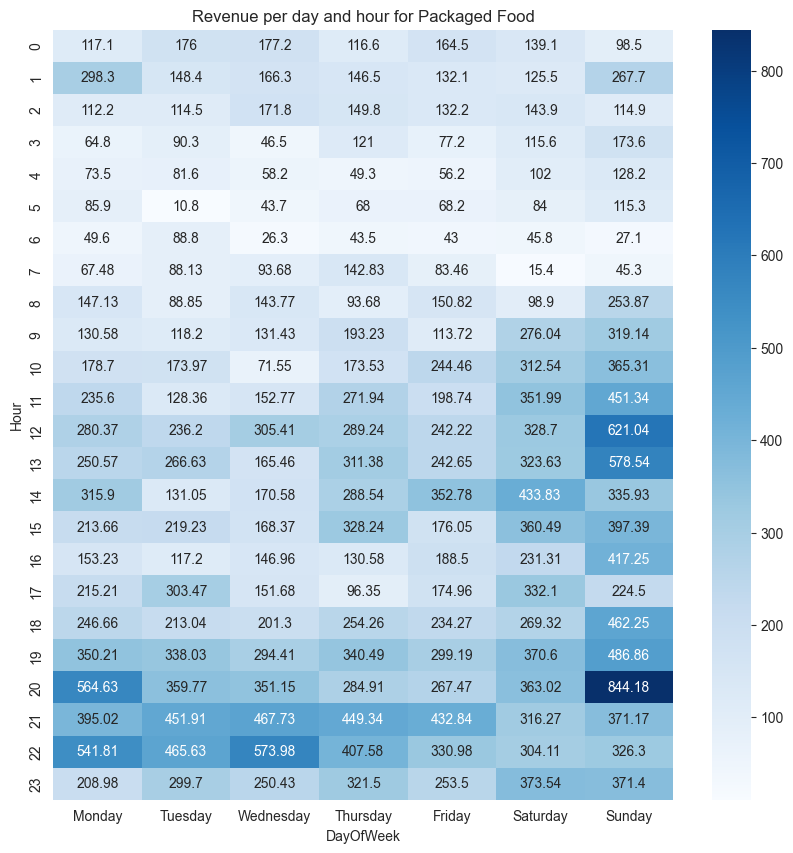

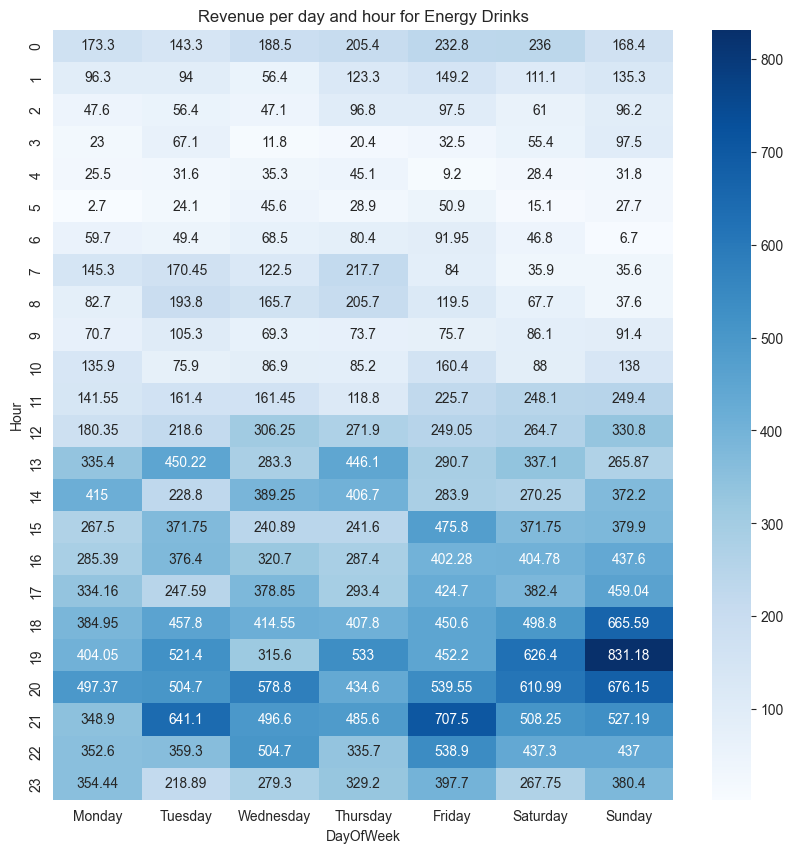

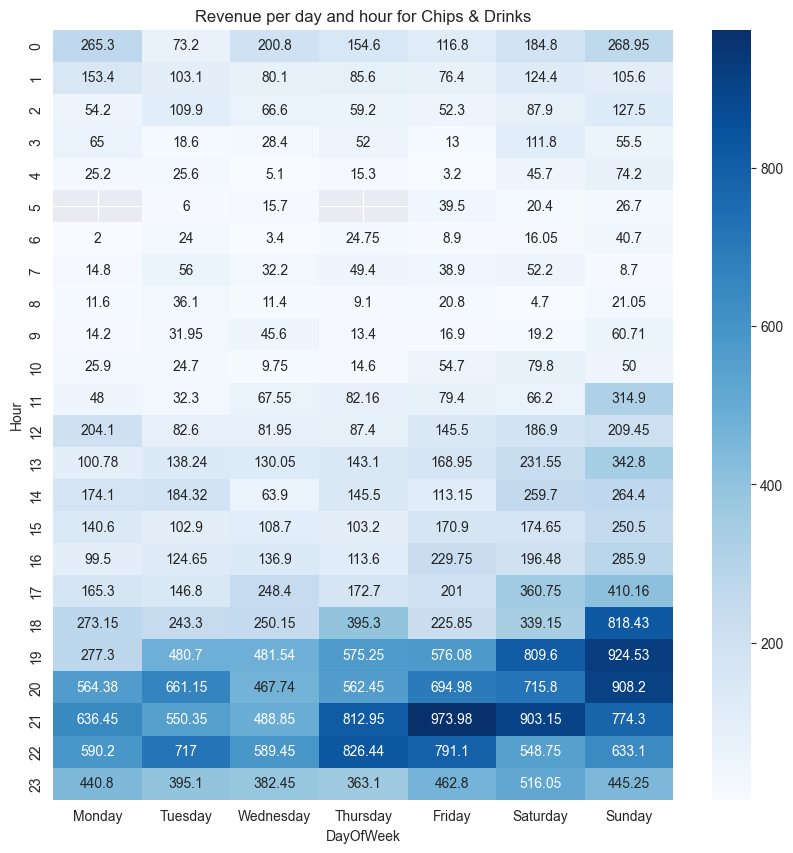

In [147]:
for category in baskets['cluster'].unique():
    baskets_categ = baskets[baskets['cluster'] == category]
    # Group by month,day,hour and InvoiceGlobalID
    grouped_data = baskets_categ.groupby(['DayOfWeek', 'Hour']).agg({
        'InvoiceGlobalId': 'nunique',  # Counting the number of unique transactions per group
        'Revenue': 'sum'      # Summing up the revenue per group
    }).reset_index()
    # Create a heatmap of the number of transactions per day and hour

    # Create a pivot table and sort the columns by day of week for month 10
    pivot_table = grouped_data.pivot_table(index='Hour', columns='DayOfWeek', values='Revenue').reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    
    # Create heatmap
    plt.figure(figsize=(10, 10))
    # Make the cmap to be a gradient of blue but for the lowest value to be white
    cmap = 'Blues'
    sns.heatmap(pivot_table, annot=True, fmt='g', cmap=cmap)
    plt.title('Revenue per day and hour for {}'.format(category))
    plt.show()